<a href="https://colab.research.google.com/github/KristinaMilberg/cs102/blob/homework06/%D0%9C%D0%B8%D0%BB%D1%8C%D0%B1%D0%B5%D1%80%D0%B3_%D0%9A%D1%80%D0%B8%D1%81%D1%82%D0%B8%D0%BD%D0%B0_%22%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_6_%D1%87%D0%B0%D1%81%D1%82%D1%8C1_22_23_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Дескриптивный анализ данных

>$\color{red}{\text{Прежде чем перейти в выполнению заданий,}}$ 
$\color{red}{\text{через меню Файл подключите свой гугл-колаб к своему гитхабу. }}$
$\color{red}{\text{Создайте для этой работы отдельную ветку и папку – homework06.}}$

*Построение всех графиков выполняется только при помощи средств визуализации `Python`: `matplotlib`, `seaborn`, `pandas`. По каждому заданию должен быть сделан вывод. Для всех визуализаций используйте стиль `seaborn`. Обязательно добавляйте подпись графика и осей.* 

В этой практической работе вам предстоит провести анализ данных об особенностях жанров музыки. Датасет возьмите [отсюда](https://www.kaggle.com/vicsuperman/prediction-of-music-genre). Он содержит 41700 уникальных исполниителей.

Данные содержат 18 столбцов:
- `instance_id` - id строки датасета
- `artist_name` - исполнитель
- `track_name` - название трека
- `popularity` - индекс популярности трека
- `acousticness` - акустичность
- `danceability` - танцевальность (насколько трек подходит для танцев)
- `duration_ms` - длительность трека
- `energy` - энергичность трека
- `instrumentalness` - инструментальность
- `key` - регистр (высота тона)
- `liveness` - живость
- `loudness` - громкость
- `mode` - тональность
- `speechiness` - насколько много текста
- `tempo` - музыкальный темп
- `obtained_date` - дата загрузки трека в датасет
- `valence` - настроение
- `music_genre` - жанр

## Часть 1

Выполните все задания ниже с помощью библиотеки `pandas`.

### Задание 1

1. Загрузите датасет `music_genre.csv`.
2. Возьмите 20 тысяч случайных строк из датасета (**все остальные задания выполняйте для этих 20 тысяч строк!!!**)
3. Проверьте, есть ли в датасете дублирующиеся строки. Если есть, удалите их.
4. Проверьте, есть ли а датасете строки, в которых значение в столбце `artist_name` – `empty_field`. Если есть, выведите эти строки и их количество. А затем удалите из датасета.

In [3]:
import pandas as pd
from google.colab import drive

drive.mount('/content/drive')
music = pd.read_csv("/content/drive/MyDrive/music_genre.csv")

music = music.sample(n=20000, random_state=42)

print("Число дубликатов в датасете:", music.duplicated().sum())
music.drop_duplicates(inplace=True)

empty_field_music = music.loc[music['artist_name'] == 'empty_field']
print("Число строк со значением artist_name = empty_field:", len(empty_field_music))
music.drop(empty_field_music.index, inplace=True)
music

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Число дубликатов в датасете: 0
Число строк со значением artist_name = empty_field: 975


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
25276,87766.0,XXXTENTACION,Boost!,58.0,0.0642,0.723,77601.0,0.3280,0.000000,C#,0.1230,-11.121,Major,0.4770,124.087,4-Apr,0.382,Rap
9478,29741.0,hachi,バウムクーヘン - ORIGINAL,17.0,0.4710,0.649,213200.0,0.6260,0.000210,G,0.0882,-5.551,Major,0.0516,125.06700000000001,4-Apr,0.695,Anime
28957,84644.0,Sik World,Mental Issues,58.0,0.0660,0.907,209907.0,0.4760,0.000000,C#,0.0781,-10.867,Major,0.3440,135.71200000000002,4-Apr,0.341,Rap
49429,40883.0,Young Nudy,Friday,48.0,0.1700,0.796,178987.0,0.4840,0.000000,A#,0.1510,-7.131,Minor,0.1490,137.901,4-Apr,0.158,Hip-Hop
34374,66562.0,Chris Smither,Hold On I,28.0,0.8580,0.529,243645.0,0.4960,0.016300,E,0.6900,-9.078,Major,0.0285,102.59,4-Apr,0.504,Blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43599,56644.0,Sergei Rachmaninoff,"Piano Concerto No. 3 in D Minor, Op. 30: II. I...",33.0,0.9830,0.138,576640.0,0.0478,0.916000,C#,0.3550,-24.849,Major,0.0393,68.555,4-Apr,0.037,Classical
23493,59934.0,Old Dominion,Can't Get You - Live,47.0,0.0163,0.310,195013.0,0.9490,0.000002,G,0.5430,-4.672,Major,0.1660,?,4-Apr,0.265,Country
33190,42740.0,Deep Purple,Woman from Tokyo - Single Edit; 2002 Remaster ...,31.0,0.0124,0.610,164867.0,0.7320,0.000703,E,0.1590,-10.201,Major,0.0302,127.32,4-Apr,0.640,Blues
33762,42960.0,Traffic,Freedom Rider - Remastered 2010,29.0,0.0198,0.443,325987.0,0.8180,0.032100,G,0.1910,-7.283,Minor,0.0329,112.405,4-Apr,0.484,Blues


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Задание 2

1. Выведите долю каждого жанра в датасете.
2. Покажите на горизонтальной столбиковой диаграмме распределение количества треков по жанрам. Выделите контрастным цветом жанр, в котором больше всего песен.
3. Найдите самый танцевальный жанр. У самого танцевального жанра среднее значение показателя danceability должно быть наивысшим.
4. Для каждого жанра определите, какая тональность в нем преобладает – количество треков какой тональность больше (минор или мажор).

Доля каждого жанра в датасете:
Electronic     0.102923
Anime          0.101924
Rap            0.100662
Hip-Hop        0.100347
Blues          0.099611
Jazz           0.099138
Alternative    0.099085
Classical      0.099085
Country        0.098665
Rock           0.098560
Name: music_genre, dtype: float64


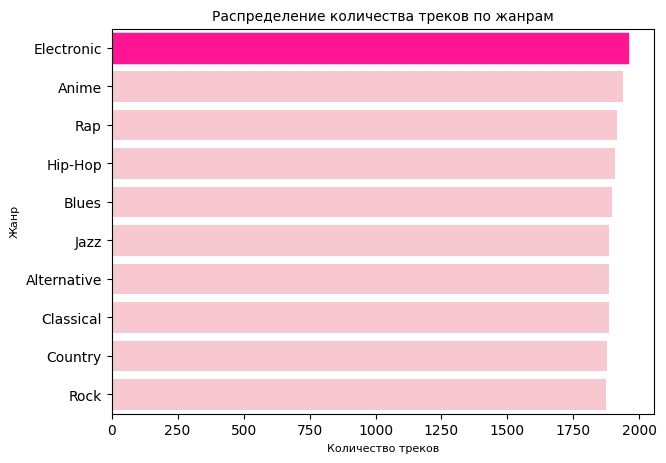

Самый танцевальный жанр: Hip-Hop


mode,Major,Minor,Преобладающая тональность
music_genre,,,
Alternative,1179,706,Major
Anime,1209,730,Major
Blues,1328,567,Major
Classical,1272,613,Major
Country,1640,237,Major
Electronic,1056,902,Major
Hip-Hop,1072,837,Major
Jazz,1024,862,Major
Rap,1064,851,Major


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Доля каждого жанра в датасете
genre_counts = music['music_genre'].value_counts(normalize=True)
print("Доля каждого жанра в датасете:")
print(genre_counts)

# 2. Распределение количества треков по жанрам на горизонтальной столбиковой диаграмме
# количество треков в каждом жанре
count_by_genre = music['music_genre'].value_counts()
# Рисуем столбиковую диаграмму
plt.figure(figsize=(7, 5))
sns.barplot(x=count_by_genre.values, y=count_by_genre.index, color='pink')
# Выделяем столбик с жанром, у которого больше всего песен
max_genre = count_by_genre.idxmax()
max_index = count_by_genre.index.get_loc(max_genre)
plt.gca().get_children()[max_index].set_color('deeppink')
plt.title('Распределение количества треков по жанрам', fontsize=10)
plt.xlabel('Количество треков', fontsize=8)
plt.ylabel('Жанр', fontsize=8)
plt.show()

# 3. Самый танцевальный жанр
danceability_by_genre = music.groupby('music_genre')['danceability'].mean()
most_danceable_genre = danceability_by_genre.idxmax()
print(f'Самый танцевальный жанр: {most_danceable_genre}')

# 4. Определение преобладающей тональности для жанров
tonality_by_genre = pd.crosstab(music['music_genre'], music['mode'])
tonality_by_genre['Преобладающая тональность'] = tonality_by_genre.idxmax(axis=1)
tonality_by_genre

### Задание 3

1. Выведите исполнителя, у которого больше всего треков в датасете. И того, у которого их меньше всех.
2. Покажите на горизонтральной столбиковой диаграмме топ-20 исполнителей. Изучите результат и сделайте выводы.

Исполнитель с наибольшим количеством треков: Nobuo Uematsu (185 треков)
Исполнитель с наименьшим количеством треков: watt (1 трек)


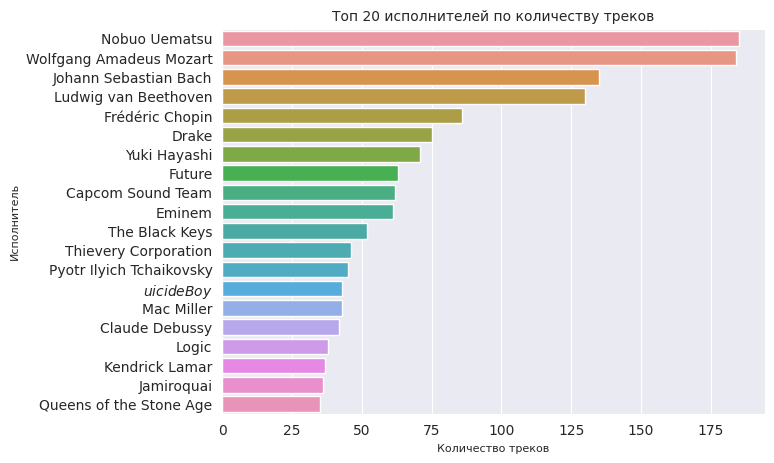

In [56]:
# исполнитель с наибольшим количеством треков
max_artist = music['artist_name'].value_counts().index[0]
max_count = music['artist_name'].value_counts()[0]

# исполнитель с наименьшим количеством треков
min_artist = music['artist_name'].value_counts().index[-1]
min_count = music['artist_name'].value_counts()[-1]

print(f"Исполнитель с наибольшим количеством треков: {max_artist} ({max_count} треков)")
print(f"Исполнитель с наименьшим количеством треков: {min_artist} ({min_count} трек)")

# топ-20 исполнителей по количеству треков
top_artists = music['artist_name'].value_counts().head(20)

# настройка графика
sns.set_style("darkgrid")
plt.figure(figsize=(7,5))

# построение графика
ax = sns.barplot(x=top_artists.values, y=top_artists.index)
ax.set_title("Топ 20 исполнителей по количеству треков", fontsize=10)
ax.set_xlabel("Количество треков", fontsize=8)
ax.set_ylabel("Исполнитель", fontsize=8)

plt.show()

# Вывод:
# Изучив график, можно заметить, что большинство исполнителей имеют не очень большое количество треков (менее 100), в то время как топ-4 исполнителей имеют более 125 треков каждый.

### Задание 4

1. Постройте корреляционную матрицу для характеристик треков. Между какими характеристиками сильная корреляция? Между какими слабая? Есть ли характеристики, между которыми корреляции практически нет.
2. Посчитайте корреляцию между популярностью (popularity) и длиной названия трека.

                  instance_id  popularity  acousticness  danceability  \
instance_id          1.000000    0.013304     -0.000620      0.003872   
popularity           0.013304    1.000000     -0.295690      0.357135   
acousticness        -0.000620   -0.295690      1.000000     -0.343328   
danceability         0.003872    0.357135     -0.343328      1.000000   
duration_ms         -0.017384   -0.088696      0.054987     -0.152501   
energy               0.003536    0.218129     -0.792353      0.261126   
instrumentalness    -0.004484   -0.365253      0.383110     -0.302215   
liveness             0.003414   -0.042699     -0.102830     -0.048315   
loudness             0.003734    0.319326     -0.730422      0.389621   
speechiness         -0.000566    0.216713     -0.167900      0.275845   
valence              0.007723    0.128030     -0.255326      0.432539   

                  duration_ms    energy  instrumentalness  liveness  loudness  \
instance_id         -0.017384  0.003536   

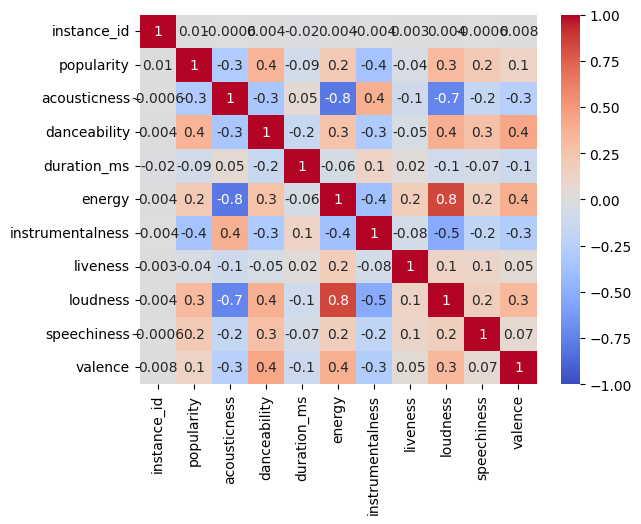

Коэффициент корреляции между популярностью и длиной названия трека:  -0.2131970478431408


In [9]:
# игнорируем warnings
import warnings
warnings.filterwarnings("ignore")

# построим корреляционную матрицу для характеристик треков
corr_matrix = music.corr()
print(corr_matrix)
# нарисуем heatmap корреляционной матрицы
sns.heatmap(corr_matrix, annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, cmap="coolwarm")
plt.show()

correlation = music['popularity'].corr(music['track_name'].str.len())
print("Коэффициент корреляции между популярностью и длиной названия трека: ", correlation)

# Сильная корреляция есть между следующими парами характеристик:
# energy и loudness (коэффициент корреляции 0.838)
# acousticness и instrumentalness (коэффициент корреляции -0.792)
# danceability и valence (коэффициент корреляции 0.435)

# Слабая корреляция наблюдается между:
# popularity и duration_ms (коэффициент корреляции -0.084)
# popularity и liveness (коэффициент корреляции -0.039)
# popularity и speechiness (коэффициент корреляции 0.224)
# duration_ms и liveness (коэффициент корреляции 0.020)
# duration_ms и valence (коэффициент корреляции -0.131)
# liveness и valence (коэффициент корреляции 0.052)

# Корреляции практически нет между:
# duration_ms и speechiness (коэффициент корреляции -0.084)

### Задание 5

Покажите на ящиковой диаграмме отношение популярности треков к жанру. Какие жанры похожи между собой?

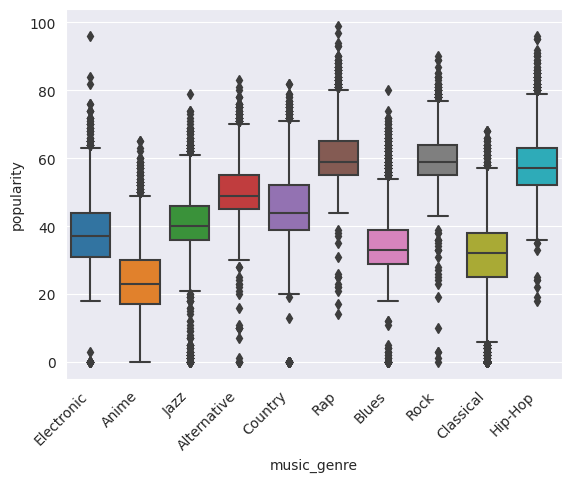

In [102]:
sns.boxplot(x='music_genre', y='popularity', data=music)
plt.xticks(rotation=45, ha='right');

# Между собой похожи:
# Blues, Classical;
# Rap, Rock, Hip-Hop

### Задание 6

Для топ-3 жанров покажите на круговой диаграмме с группировкой самого популярного исполнителя. Диаграмма должна быть одна.

music_genre
Rap        60.4974
Rock       59.6412
Hip-Hop    58.3996
Name: popularity, dtype: float64
['Rap', 'Rock', 'Hip-Hop']
['Coolio', 'Ben E. King', 'Duki']
[2, 1, 1]


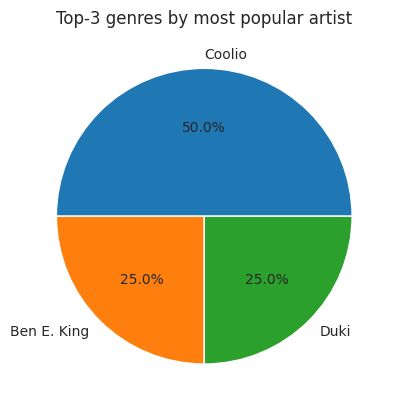

In [131]:
# # сгруппировать данные по жанру
# grouped_data = music.groupby('music_genre')
# # вычислить среднее значение популярности для каждого жанра
# mean_popularity_by_genre = grouped_data['popularity'].mean()
# # отсортировать жанры по убыванию среднего значения популярности
# top_genres = mean_popularity_by_genre.sort_values(ascending=False).head(3)

# Выберем топ-3 жанров по популярности
top_genres = music.groupby('music_genre')['popularity'].mean().sort_values(ascending=False).head(3)
print(top_genres)
top_genres = top_genres.index.tolist()
print(top_genres)
# Для каждого из топ-3 жанров выберем самого популярного исполнителя
top_artists = []
for genre in top_genres:
    artist = music[music['music_genre'] == genre].groupby('artist_name')['popularity'].mean().sort_values(ascending=False).index[0]
    top_artists.append(artist)
print(top_artists)
# Подсчитаем количество треков каждого из выбранных исполнителей и нарисуем круговую диаграмму
counts = []
for artist in top_artists:
    count = music[music['artist_name'] == artist].shape[0]
    counts.append(count)
print(counts)
# Нарисуем круговую диаграмму
plt.pie(counts, labels=top_artists, autopct='%1.1f%%')
plt.title('Top-3 genres by most popular artist')
plt.show()


### Задание 7

На вертикальной столбиковой диаграмме для самого популярного (popularity) и самого непопулярного жанров покажите средние значения по всем характеристикам. Отрицательные и положительные значения характеристик показывайте разными цветами.

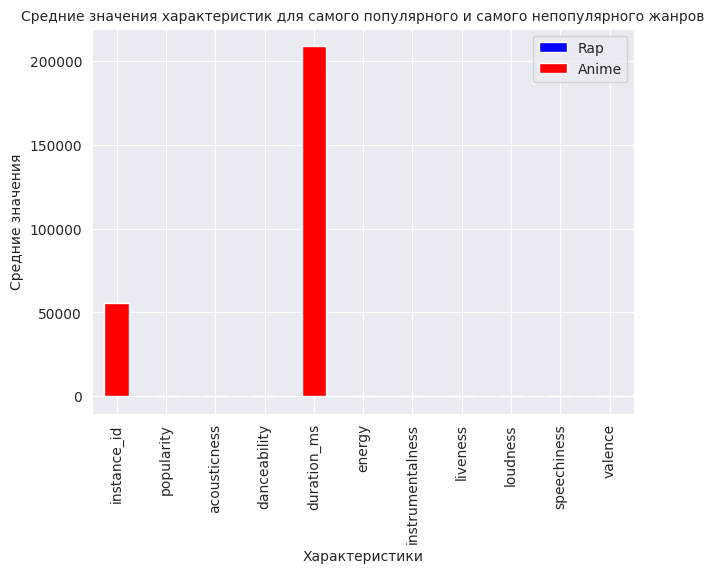

In [116]:
# Вычисляем средние значения по всем характеристикам для каждого жанра
grouped = music.groupby('music_genre').mean()

# Сортируем жанры по популярности и выбираем самый популярный и самый непопулярный жанры
popularity_sorted = grouped.sort_values('popularity', ascending=False)
most_popular_genre = popularity_sorted.index[0]
least_popular_genre = popularity_sorted.index[-1]

# Выбираем данные для самого популярного и самого непопулярного жанров
most_popular_genre_data = grouped.loc[most_popular_genre]
least_popular_genre_data = grouped.loc[least_popular_genre]

# Строим вертикальную столбиковую диаграмму
fig, ax = plt.subplots(figsize=(7, 5))
most_popular_genre_data.plot.bar(ax=ax, color='blue', label=most_popular_genre)
least_popular_genre_data.plot.bar(ax=ax, color='red', label=least_popular_genre)

# Настраиваем отображение графика
ax.set_title('Средние значения характеристик для самого популярного и самого непопулярного жанров', fontsize=10)
ax.set_xlabel('Характеристики')
ax.set_ylabel('Средние значения')
ax.legend()
plt.show()
# import numpy as np
# # Выберем самый популярный жанр
# most_popular_genre = music.groupby('music_genre')['popularity'].mean().idxmax()
# # Выберем самый непопулярный жанр
# least_popular_genre = music.groupby('music_genre')['popularity'].mean().idxmin()
# # Отфильтруем данные
# most_popular_data = music[music['music_genre'] == most_popular_genre].iloc[:, 1:].mean()
# least_popular_data = music[music['music_genre'] == least_popular_genre].iloc[:, 1:].mean()
# # Создадим список цветов для отрицательных и положительных значений
# colors = ['red' if val < 0 else 'green' for val in most_popular_data]
# # Построим диаграмму
# fig, ax = plt.subplots(figsize=(7, 5))
# x = np.arange(len(most_popular_data))
# width = 0.5
# ax.bar(x - width/2, most_popular_data, width, color=colors)
# ax.bar(x + width/2, least_popular_data, width, color=colors)
# ax.set_xticks(x)
# ax.set_xticklabels(most_popular_data.index)
# ax.set_title('Средние значения характеристик для самого популярного и самого непопулярного жанров', fontsize=10)
# ax.set_xlabel('Характеристики')
# ax.set_ylabel('Средние значения')
# ax.legend([most_popular_genre, least_popular_genre])
# plt.show()

### Задание 8

1. Добавьте в данные категориальный столбец `длительность_трека`, в котором будут значения: "короткая" (<=3min), "средняя" (>3min, <=5min), "длинная" (>5min). 
2. Покажите график плотности распределения данных в столбце `loudness`, сгруппированных по категориям длительности.
3. На круговой диаграмме вида "пончик" покажите численное соотношение треков разной длительности.

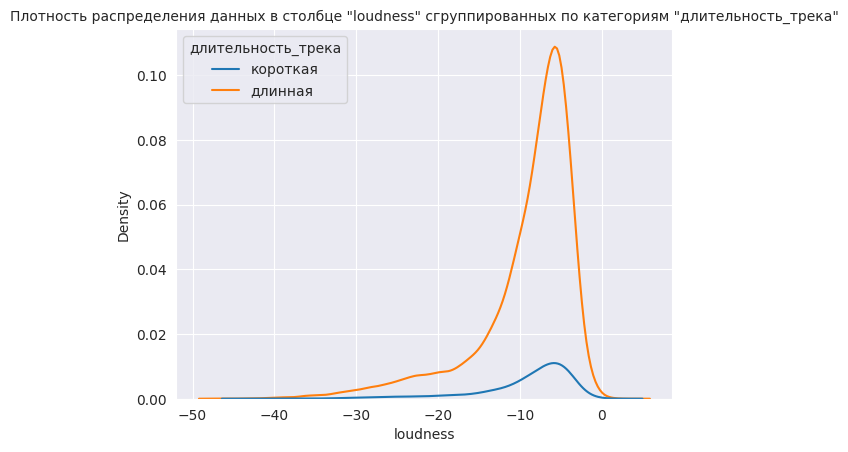

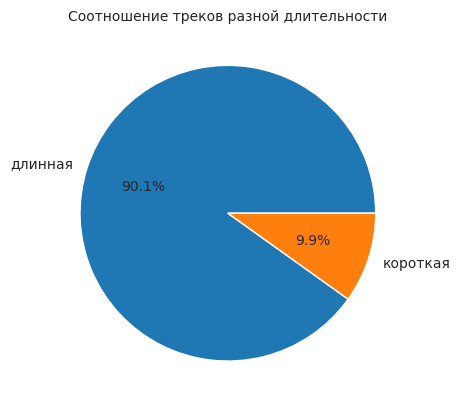

In [120]:
# создаем функцию для определения длительности трека
def track_duration(duration):
    if duration <= 180: # короткая, если длительность <= 3 минут
        return 'короткая'
    elif duration <= 300: # средняя, если длительность > 3 минут и <= 5 минут
        return 'средняя'
    else: # длинная, если длительность > 5 минут
        return 'длинная'

# добавляем новый столбец "длительность_трека" в DataFrame
music['длительность_трека'] = music['duration_ms'].apply(track_duration)

# строим график плотности распределения данных в столбце "loudness" сгруппированных по категориям "длительность_трека"
sns.kdeplot(data=music, x='loudness', hue='длительность_трека')
plt.title('Плотность распределения данных в столбце "loudness" сгруппированных по категориям "длительность_трека"', fontsize=10)
plt.show()

# считаем количество треков для каждой категории длительности
duration_counts = music['длительность_трека'].value_counts()

# строим круговую диаграмму "пончик" с численным соотношением треков разной длительности
plt.pie(x=duration_counts, labels=duration_counts.index, autopct='%.1f%%')
plt.title('Соотношение треков разной длительности', fontsize=10)
plt.show()

## Часть 2

Выполните на языке R следующие задания:
- задание 1 – целиком
- задание 2 – целиком
- задание 3 – целиком
- задание 4 – целиком
- задание 5 – целиком
- задание 6 – не выполнять
- задание 7 – целиком
- задание 8 – целиком, но в третьем пункте постройте круговую диаграмму

Задание для части 2 выполняйте в отдельном гугл-колабе, настроенном для языка R. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

## Часть 3 (дополнительная)

Часть не является обязательной, но ее верное(!) выполнение освобождает вас от защиты работы.

Выполните на языке SQL следующие задания:
- задание 1 – пункт 4
- задание 2 – пункты 1, 3, 4
- задание 3 – целиком, но без графика во втором пункте
- задание 4 – не выполнять
- задание 5 – не выполнять
- задание 6 – не выполнять
- задание 7 – не выполнять
- задание 8 – пункт 1 и пункт 3 (в 3 пункте просто посчитайте количество треков каждой длительности)

Задание для части 3 выполняйте в отдельном гугл-колабе. Гугл-колаб с решениями второй части также соедините с веткой homework06 своего гитхаба.

#### Пример

In [ ]:
import pandas as pd
df = pd.read_csv("music_genre.csv")
df.head()

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.00200000000001,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
df[["artist_name", "track_name", "music_genre"]].values.tolist()[:10]

[['Röyksopp', "Röyksopp's Night Out", 'Electronic'],
 ['Thievery Corporation', 'The Shining Path', 'Electronic'],
 ['Dillon Francis', 'Hurricane', 'Electronic'],
 ['Dubloadz', 'Nitro', 'Electronic'],
 ['What So Not', 'Divide & Conquer', 'Electronic'],
 ['Axel Boman', 'Hello', 'Electronic'],
 ['Jordan Comolli', 'Clash', 'Electronic'],
 ['Hraach', 'Delirio', 'Electronic'],
 ['Kayzo', 'NEVER ALONE', 'Electronic'],
 ['Shlump', 'Lazer Beam', 'Electronic']]

In [ ]:
import sqlite3

# создаем таблицу в БД
con = sqlite3.connect(":memory:")
cur = con.cursor()
cur.execute("CREATE TABLE music (artist, track, genre);")

# переносим в таблицу данные
cur.executemany("INSERT INTO music (artist, track, genre) "
                "VALUES (?, ?, ?);",
                df[["artist_name", "track_name", "music_genre"]].values.tolist())

# сохраняем изменения
con.commit()

# создаем и выполняем запрос
get_songs_per_artist = "SELECT artist, " \
       "COUNT(artist) AS number_of_songs " \
       "FROM music " \
       "GROUP BY artist " \
       "ORDER BY number_of_songs " \
       "DESC;"
cur.execute(get_songs_per_artist)

result = cur.fetchall()
result[:20]

[('empty_field', 2489),
 ('Nobuo Uematsu', 429),
 ('Wolfgang Amadeus Mozart', 402),
 ('Ludwig van Beethoven', 317),
 ('Johann Sebastian Bach', 314),
 ('Frédéric Chopin', 241),
 ('Drake', 172),
 ('Capcom Sound Team', 169),
 ('Yuki Hayashi', 167),
 ('Eminem', 147),
 ('Future', 124),
 ('Thievery Corporation', 122),
 ('The Black Keys', 114),
 ('Pyotr Ilyich Tchaikovsky', 103),
 ('Kevin Gates', 102),
 ('Mac Miller', 97),
 ('Howard Shore', 93),
 ('Logic', 92),
 ('$uicideBoy$', 92),
 ('Ryuichi Sakamoto', 90)]